In [1]:
#Decision Tree Classifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import  precision_score, recall_score

from sklearn.metrics import f1_score as f1Score


In [2]:
dataset = pd.read_csv(r"C:/Users/mmerk/OneDrive/Desktop/Oblivion/univero sss/ai/archive/smoking_health_data_final1.csv")

In [5]:
dataset

,age,sex,current_smoker,heart_rate,blood_pressure,cigs_per_day,chol
0,54,male,yes,95,110/72,0,219.0
1,45,male,yes,64,121/72,0,248.0
2,58,male,yes,81,127.5/76,0,235.0
3,42,male,yes,90,122.5/80,0,225.0
4,42,male,yes,62,119/80,0,226.0
...,...,...,...,...,...,...,...
3895,37,male,yes,88,122.5/82.5,60,254.0
3896,49,male,yes,70,123/75,60,213.0
3897,56,male,yes,70,125/79,60,246.0
3898,50,male,yes,85,134/95,60,340.0


In [7]:

def categorize_cholesterol(value):
    if value < 200:
        return 1
    elif 200 <= value < 248:
        return 2
    else:
        return 3




In [9]:
dataset = dataset.fillna(0)

if 'chol' in dataset.columns:
   
    dataset['chol'] = pd.to_numeric(dataset['chol'], errors='coerce')  # Convert to numeric, set invalid to NaN
    dataset['chol'] = dataset['chol'].fillna(0) 

    dataset['target'] = dataset['chol'].apply(categorize_cholesterol)

In [11]:
dataset['target'] = dataset['chol'].apply(categorize_cholesterol)
X = dataset.drop(['chol', 'target'], axis=1)
Y = dataset['target'] 
#dataset

In [13]:
dataset = dataset.fillna(0)

if 'blood_pressure' in dataset.columns:
    dataset[['blood_pressure_systolic', 'blood_pressure_diastolic']] = dataset['blood_pressure'].str.split('/', expand=True)
    dataset['blood_pressure_systolic'] = pd.to_numeric(dataset['blood_pressure_systolic'], errors='coerce').fillna(0)
    dataset['blood_pressure_diastolic'] = pd.to_numeric(dataset['blood_pressure_diastolic'], errors='coerce').fillna(0)
    dataset = dataset.drop(['blood_pressure'], axis=1)

In [15]:
dataset = pd.get_dummies(dataset, columns=['sex'])
dataset = pd.get_dummies(dataset, columns=['current_smoker'])

In [17]:
dataset = dataset.drop(['chol', 'target'], axis=1)
print(dataset.head())


   age  heart_rate  cigs_per_day  blood_pressure_systolic  \
0   54          95             0                    110.0   
1   45          64             0                    121.0   
2   58          81             0                    127.5   
3   42          90             0                    122.5   
4   42          62             0                    119.0   

   blood_pressure_diastolic  sex_female  sex_male  current_smoker_no  \
0                      72.0       False      True              False   
1                      72.0       False      True              False   
2                      76.0       False      True              False   
3                      80.0       False      True              False   
4                      80.0       False      True              False   

   current_smoker_yes  
0                True  
1                True  
2                True  
3                True  
4                True  


In [19]:
dataset

,age,heart_rate,cigs_per_day,blood_pressure_systolic,blood_pressure_diastolic,sex_female,sex_male,current_smoker_no,current_smoker_yes
0,54,95,0,110.0,72.0,False,True,False,True
1,45,64,0,121.0,72.0,False,True,False,True
2,58,81,0,127.5,76.0,False,True,False,True
3,42,90,0,122.5,80.0,False,True,False,True
4,42,62,0,119.0,80.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...
3895,37,88,60,122.5,82.5,False,True,False,True
3896,49,70,60,123.0,75.0,False,True,False,True
3897,56,70,60,125.0,79.0,False,True,False,True
3898,50,85,60,134.0,95.0,False,True,False,True


In [21]:
dataset['sex_female'] = dataset['sex_female'].replace({True: 1, False: 0})
dataset['sex_male'] = dataset['sex_male'].replace({True: 1, False: 0})
dataset['current_smoker_no'] = dataset['current_smoker_no'].replace({True: 1, False: 0})
dataset['current_smoker_yes'] = dataset['current_smoker_yes'].replace({True: 1, False: 0})
dataset

,age,heart_rate,cigs_per_day,blood_pressure_systolic,blood_pressure_diastolic,sex_female,sex_male,current_smoker_no,current_smoker_yes
0,54,95,0,110.0,72.0,0,1,0,1
1,45,64,0,121.0,72.0,0,1,0,1
2,58,81,0,127.5,76.0,0,1,0,1
3,42,90,0,122.5,80.0,0,1,0,1
4,42,62,0,119.0,80.0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
3895,37,88,60,122.5,82.5,0,1,0,1
3896,49,70,60,123.0,75.0,0,1,0,1
3897,56,70,60,125.0,79.0,0,1,0,1
3898,50,85,60,134.0,95.0,0,1,0,1


In [23]:
#X = dataset.drop(['chol', 'target'], axis=1)
#X = dataset.drop(['chol', 'target', 'blood_pressure'], axis=1)
#Y = dataset['target']  


In [25]:
X= dataset

In [27]:
test_size1 = 0.2
random_state1 =0
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size1, random_state=random_state1 )



In [29]:
#classifier = DecisionTreeClassifier(max_depth=5, random_state=1)
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
#!!!!!!!!!!!

In [31]:
classifier.fit(X_train, Y_train)

#classifier = DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=1)
#classifier.fit(X_train, Y_train) 
#!!!!!!!!!!!!!!!!!!!!!!!

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [33]:
Y_pred = classifier.predict(X_test)

In [35]:
accuracy= accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
report_dict = classification_report(Y_test, Y_pred, output_dict=True)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Decision_Tree_Classifier_Accuracy:", accuracy)
print("Classification_Report:\n", classification_report(Y_test, Y_pred))
print("Confusion_Matrix:\n", confusion_matrix(Y_test, Y_pred))

Decision_Tree_Classifier_Accuracy: 0.5025641025641026
Classification_Report:
               precision    recall  f1-score   support

           1       0.47      0.21      0.29       168
           2       0.47      0.75      0.58       322
           3       0.61      0.40      0.48       290

    accuracy                           0.50       780
   macro avg       0.52      0.45      0.45       780
weighted avg       0.52      0.50      0.48       780

Confusion_Matrix:
 [[ 35 113  20]
 [ 27 242  53]
 [ 13 162 115]]


In [37]:
report = classification_report(Y_test, Y_pred, output_dict=True)

In [39]:
categories = list(report.keys())[:-3]  
precision = [report[category]['precision'] for category in categories]
recall = [report[category]['recall'] for category in categories]
f1_score = [report[category]['f1-score'] for category in categories]
support = [report[category]['support'] for category in categories]

In [41]:
print(f1_score)

[0.2880658436213992, 0.5768772348033373, 0.4811715481171548]


In [43]:
x = np.arange(len(categories))
width = 0.25

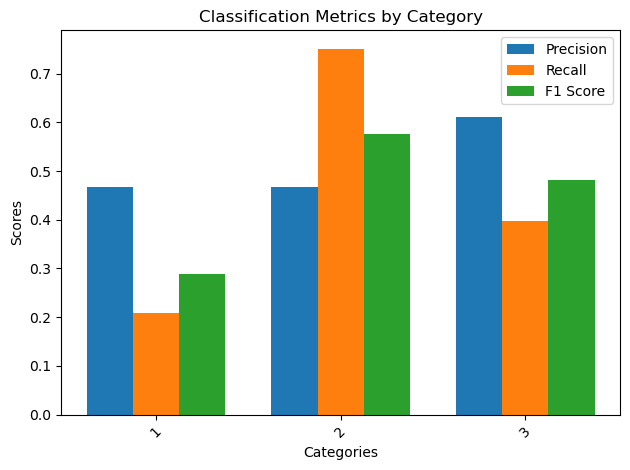

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
bar1 = ax.bar(x - width, precision, width, label='Precision')
bar2 = ax.bar(x, recall, width, label='Recall')
bar3 = ax.bar(x + width, f1_score, width, label='F1 Score')

ax.set_xlabel('Categories')
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


In [47]:
##Blue bars represent Precision
#Orange bars represent Recall
#Green bars represent F1 Score

'''
This bar chart shows the classification performance metrics—precision, recall, and F1-score—for 
three categories (1, 2, and 3). Each metric is represented by a different colour: blue for 
precision, orange for recall, and green for the F1 score. The scores for category 3 are the
highest across all metrics, indicating better model performance for this class than the others.
Category 1 has relatively lower scores, suggesting that the model struggles more with this class. 
'''

'\nThis bar chart shows the classification performance metrics—precision, recall, and F1-score—for \nthree categories (1, 2, and 3). Each metric is represented by a different colour: blue for \nprecision, orange for recall, and green for the F1 score. The scores for category 3 are the\nhighest across all metrics, indicating better model performance for this class than the others.\nCategory 1 has relatively lower scores, suggesting that the model struggles more with this class. \n'

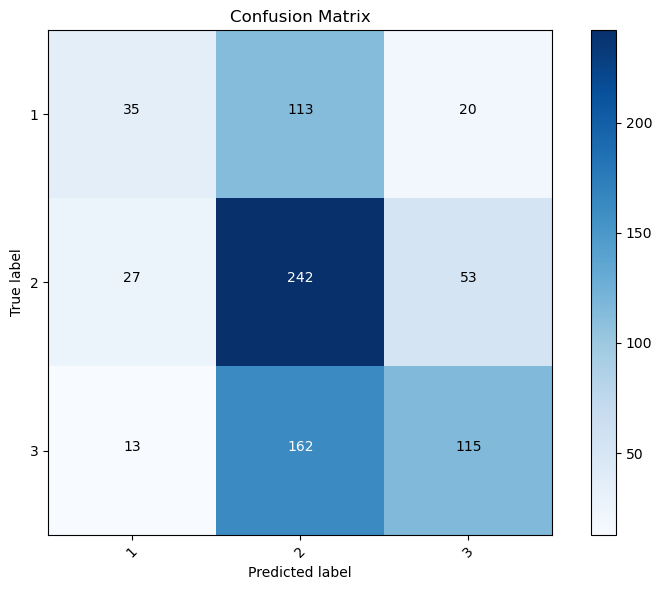

In [49]:

conf_matrix = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Define tick marks for classes
categories = np.unique(Y_test)  # Ensure categories are derived from the data
tick_marks = np.arange(len(categories))
plt.xticks(tick_marks, categories, rotation=45)
plt.yticks(tick_marks, categories)

# Add numerical values to the confusion matrix
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()


In [51]:
'''
This confusion matrix visualizes the performance of a classification model across three classes: 
1, 2, and 3. The rows represent the true labels, while the columns represent the predicted labels.
Diagonal values (e.g., 72 for class 1, 142 for class 2, and 143 for class 3) indicate correct 
predictions. Off-diagonal values represent misclassifications, such as 62 instances of class 1
being misclassified as class 2. Class 2 has the highest correct predictions (142), but it also has 
significant misclassifications into other classes, especially class 3. Overall, the confusion matrix 
highlights areas where the model performs well (on the diagonal) and areas needing improvement (off-diagonal).
'''

'\nThis confusion matrix visualizes the performance of a classification model across three classes: \n1, 2, and 3. The rows represent the true labels, while the columns represent the predicted labels.\nDiagonal values (e.g., 72 for class 1, 142 for class 2, and 143 for class 3) indicate correct \npredictions. Off-diagonal values represent misclassifications, such as 62 instances of class 1\nbeing misclassified as class 2. Class 2 has the highest correct predictions (142), but it also has \nsignificant misclassifications into other classes, especially class 3. Overall, the confusion matrix \nhighlights areas where the model performs well (on the diagonal) and areas needing improvement (off-diagonal).\n'

In [53]:
print(conf_matrix.ndim)

2


In [55]:
Y_test 
Y_pred 

array([2, 3, 2, 1, 2, 2, 2, 3, 3, 1, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2,
       3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1,
       2, 2, 2, 3, 1, 2, 3, 2, 1, 3, 2, 3, 2, 1, 2, 2, 3, 2, 3, 1, 2, 1,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 1, 2, 3, 2, 3, 1, 2, 3,
       2, 2, 1, 2, 2, 2, 2, 3, 3, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 2, 1, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 1, 2, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 2, 3, 3, 3, 1, 2, 2, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 2, 1,
       2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 3, 2, 3, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 3, 3, 2,
       2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2,

In [57]:
from sklearn.metrics import precision_score

pre_score = precision_score(Y_test, Y_pred, average='weighted')
print("Precision Score (Weighted):", pre_score)


Precision Score (Weighted): 0.5211756683033278


In [59]:
from sklearn.metrics import recall_score

In [61]:
print("Type of f1_score:", type(f1_score))

Type of f1_score: <class 'list'>


In [63]:
accuracy_result = accuracy_score(Y_test, Y_pred)
precision_result = precision_score(Y_test, Y_pred, average='weighted')
recall_result = recall_score(Y_test, Y_pred, average='weighted')
f1_result = f1Score(Y_test, Y_pred, average='weighted')
roc_auc = None 


report_dict = classification_report(Y_test, Y_pred, output_dict=True)
conf_matrix = confusion_matrix(Y_test, Y_pred)

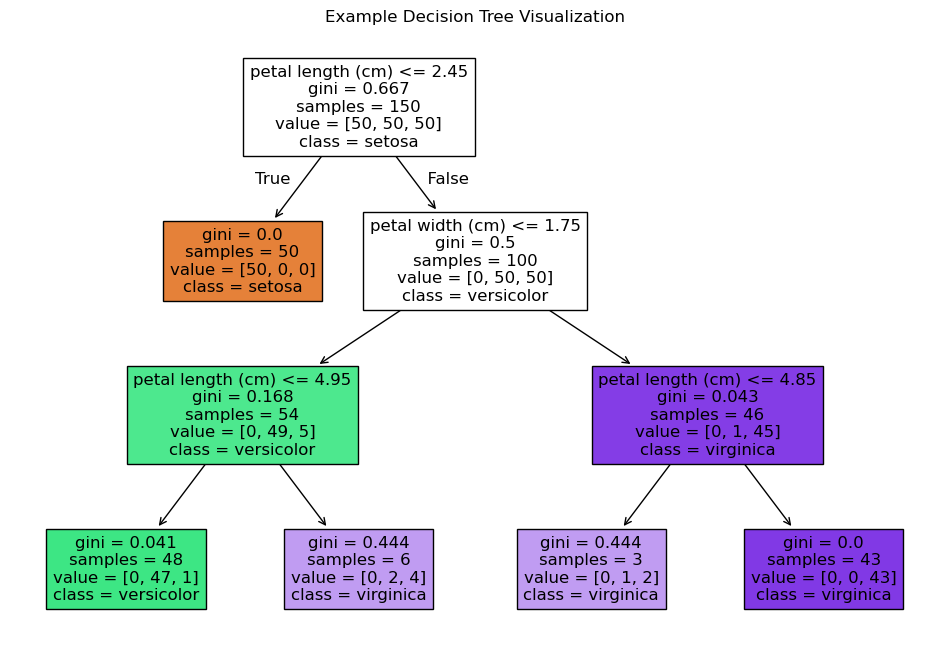

In [65]:

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names


clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X, y)


plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=feature_names, class_names=class_names, filled=True)
plt.title("Example Decision Tree Visualization")
plt.show()


In [67]:
data = {
    #"Test_Size": test_size1,
    #"random_state": random_state1,
    "accuracy": accuracy_result
}

In [151]:
import os
for label, metrics in report_dict.items():
    if isinstance(metrics, dict):  # Only include metrics for each label
        for metric, value in metrics.items():
            if metric in ['precision', 'recall', 'f1-score', 'support']:  # Only specified metrics
                data[f"{label}_{metric}"] = value


In [153]:
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        data[f"Confusion_{i}_{j}"] = conf_matrix[i, j]


In [155]:
df = pd.DataFrame([data])
csv_file = "Decision_Tree_Classifier_Results_Improve2.csv"



In [157]:

if os.path.isfile(csv_file):
    existing_df = pd.read_csv(csv_file)
    if not existing_df.equals(df):
        df.to_csv(csv_file, mode='a', header=False, index=False)
else:
    df.to_csv(csv_file, mode='w', header=True, index=False)
